This is a new version of my older script which instead of visualizing a number of jobs presents the whole data. This allows assessing typical paths across the production facility. I provide three variants - one for all jobs and two additional ones filtered to Response 0 and 1. Widths of the edges indicate the number of jobs on this station pair.

------------------------------------------------------------------------------
data.table + dplyr code now lives in dtplyr.
Please library(dtplyr)!
------------------------------------------------------------------------------

Attaching package: ‘dplyr’

The following objects are masked from ‘package:data.table’:

    between, last

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: GGally

Attaching package: ‘GGally’

The following object is masked from ‘package:dplyr’:

    nasa

network: Classes for Relational Data
Version 1.13.0 created on 2015-08-31.
copyright (c) 2005, Carter T. Butts, University of California-Irvine
                    Mark S. Handcock, University of California -- Los Angeles
                    David R. Hunter, Penn State University
                    Martina Morris, University of Washington
                    Skye B

Read 1183747 rows and 2 (of 970) columns from 1.993 GB file in 00:00:14
Read 1183747 rows and 126 (of 1157) columns from 2.695 GB file in 00:00:24


Warning message in min(which((grepl(station, colnames(dtDate))))):
“no non-missing arguments to min; returning Inf”Warning message in min(which((grepl(station, colnames(dtDate))))):
“no non-missing arguments to min; returning Inf”Warning message in left_join_impl(x, y, by$x, by$y, suffix$x, suffix$y):
“joining factors with different levels, coercing to character vector”Warning message in left_join_impl(x, y, by$x, by$y, suffix$x, suffix$y):
“joining factor and character vector, coercing into character vector”Loading required package: scales
Warning message in left_join_impl(x, y, by$x, by$y, suffix$x, suffix$y):
“joining factor and character vector, coercing into character vector”

Warning message in left_join_impl(x, y, by$x, by$y, suffix$x, suffix$y):
“joining factors with different levels, coercing to character vector”Warning message in left_join_impl(x, y, by$x, by$y, suffix$x, suffix$y):
“joining factor and character vector, coercing into character vector”Warning message in left_join_impl(x, y, by$x, by$y, suffix$x, suffix$y):
“joining factor and character vector, coercing into character vector”

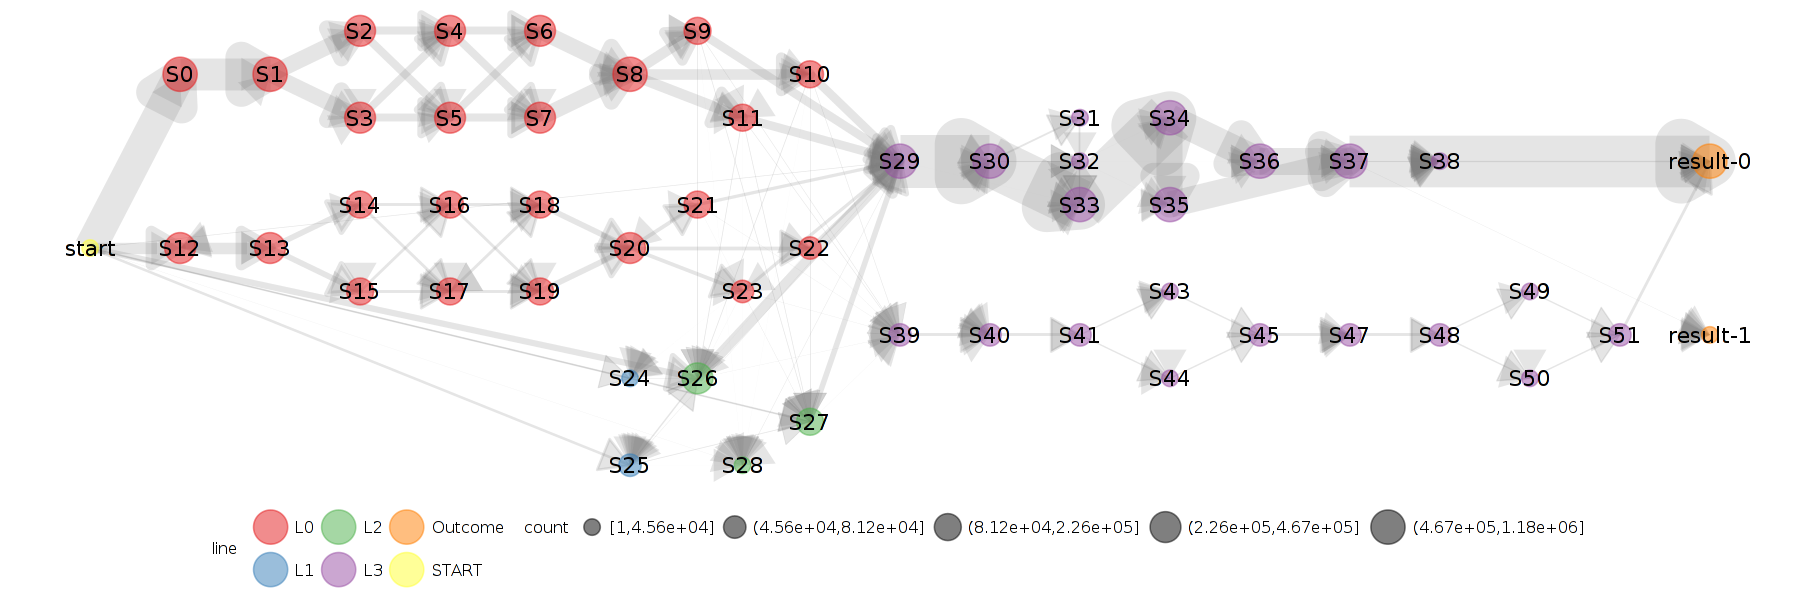

Warning message in left_join_impl(x, y, by$x, by$y, suffix$x, suffix$y):
“joining factors with different levels, coercing to character vector”Warning message in left_join_impl(x, y, by$x, by$y, suffix$x, suffix$y):
“joining factor and character vector, coercing into character vector”Warning message in left_join_impl(x, y, by$x, by$y, suffix$x, suffix$y):
“joining factor and character vector, coercing into character vector”

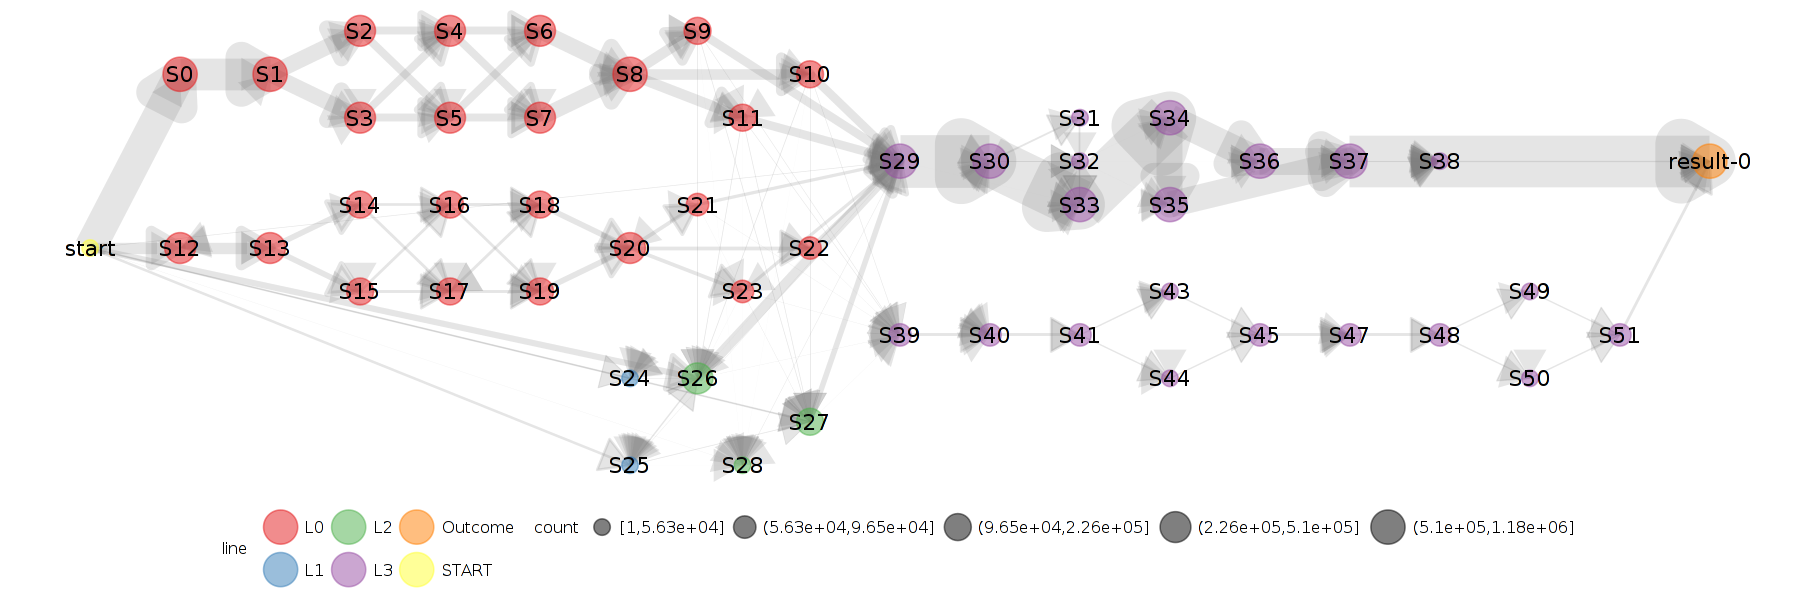

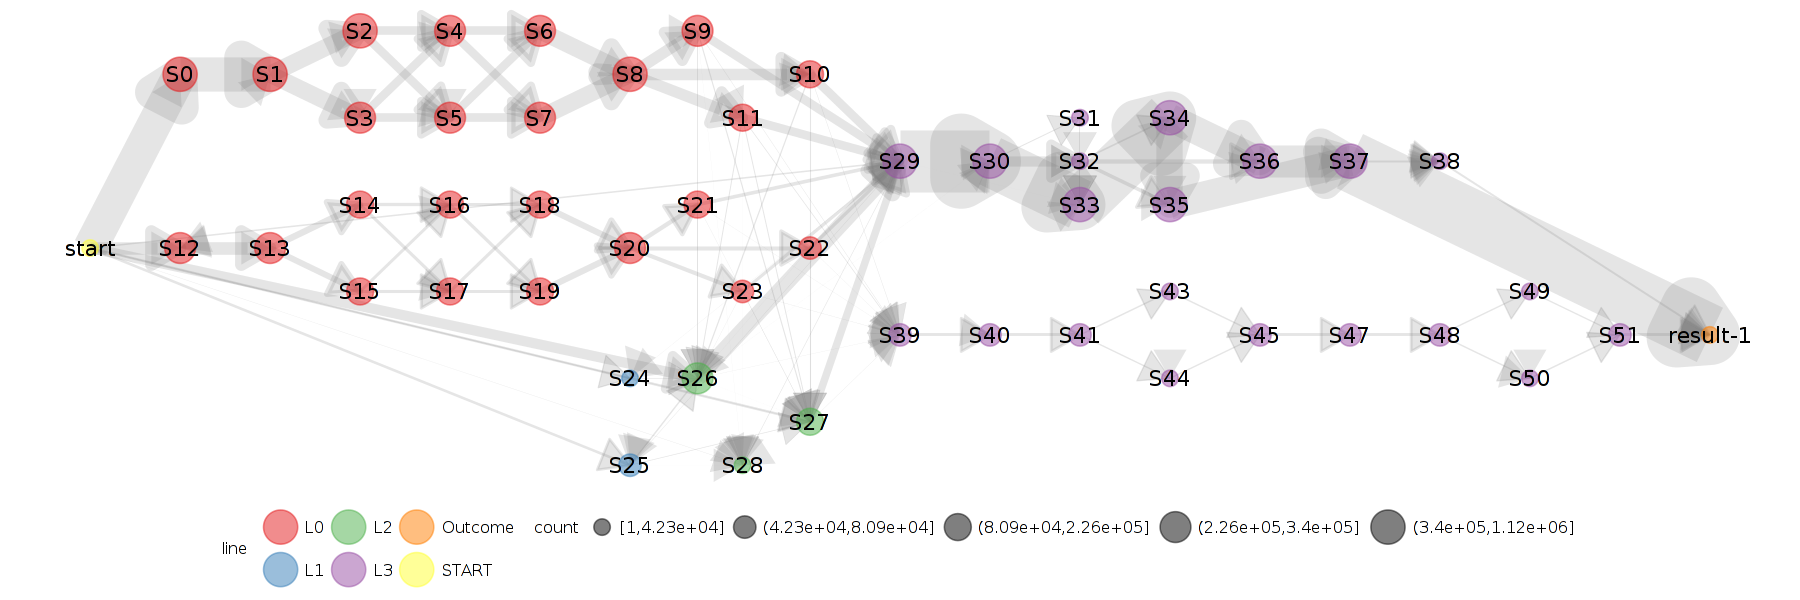

In [1]:
library(data.table)
library(dplyr)


#imports for plotting
require(GGally)
library(network)
library(sna)
library(ggplot2)
require(igraph)
require(intergraph)
library(stringr)


topFeaturesDate <- c("L3_S33_D3856","L3_S34_D3875","L3_S30_D3496","L3_S29_D3316","L3_S37_D3942",
                       "L3_S29_D3474","L0_S0_D1" ,    "L3_S30_D3506","L3_S30_D3501","L3_S30_D3726",
                       "L3_S30_D3566","L0_S3_D70" ,   "L3_S35_D3895","L0_S8_D145"  , "L2_S26_D3037",
                       "L3_S35_D3886","L3_S35_D3900","L0_S13_D355" , "L3_S36_D3919","L0_S1_D26"   ,
                       "L3_S36_D3928","L2_S26_D3081","L1_S24_D1511","L0_S12_D331" , "L1_S24_D1809",
                       "L0_S2_D34","L1_S24_D1536","L0_S14_D360" , "L1_S24_D1558","L0_S23_D617" ,
                       "L0_S6_D120","L1_S24_D1566","L1_S24_D1576","L0_S20_D462" , "L0_S4_D106"  ,
                       "L0_S1_D30","L0_S19_D454",  "L0_S7_D137","L0_S9_D152" ,  "L1_S24_D1826",
                       "L0_S16_D423","L0_S17_D432" , "L1_S24_D1568","L0_S5_D115" ,  "L1_S24_D1674",
                       "L1_S24_D1570","L0_S18_D437"  ,"L0_S10_D216","L0_S9_D157"  , "L1_S24_D1522",
                       "L0_S4_D111","L2_S27_D3130","L0_S11_D280" , "L0_S22_D543" , "L0_S9_D162"  ,
                       "L0_S10_D221","L0_S15_D395",  "L0_S9_D167"  , "L1_S24_D1765","L3_S31_D3836",
                       "L0_S22_D548","L1_S24_D1583","L0_S21_D469",  "L1_S24_D1770","L0_S10_D231" ,
                       "L0_S22_D553","L0_S21_D474" , "L1_S25_D1854","L3_S32_D3852",
                       "L3_S39_D3966","L0_S21_D484" , "L1_S25_D1867","L3_S44_D4101","L3_S40_D3981",
                       "L3_S38_D3953","L0_S22_D558" , "L1_S25_D2780","L3_S43_D4062","L3_S49_D4208",
                       "L2_S28_D3223","L1_S24_D1116","L1_S25_D2788","L3_S45_D4125","L3_S49_D4218",
                       "L3_S50_D4242","L3_S40_D3985","L1_S25_D2471","L1_S25_D2058","L1_S25_D1891",
                       "L1_S24_D677","L1_S24_D1135","L3_S43_D4082","L1_S25_D2792","L1_S25_D1883",
                       "L3_S41_D3997","L1_S25_D2098","L1_S25_D1887","L1_S25_D2754","L1_S25_D2138",
                       "L3_S51_D4255","L1_S24_D1155","L1_S25_D1980","L1_S25_D2790","L3_S47_D4140",
                     "L1_S25_D3011","L1_S25_D2240","L1_S25_D2230","L1_S25_D2798","L1_S25_D1902",
                       "L1_S24_D702","L1_S24_D697","L3_S48_D4194","L1_S25_D2996","L1_S24_D1413",
                       "L1_S24_D818","L1_S24_D1168","L1_S24_D1163","L1_S24_D1171","L1_S24_D804", 
                       "L1_S24_D909","L1_S24_D801","L1_S25_D2801","L1_S24_D1018","L1_S25_D2206","L1_S25_D2505")

#one expansion option would be to select a time frame to visualized
dtNum <- fread("../input/train_numeric.csv", select = c("Id", "Response"))
dtDate <- fread("../input/train_date.csv",select = c("Id",topFeaturesDate))

#for each job identify which stations are passed through and for those store the minimum time
for (station in paste0("S",0:51))
{
  cols = min(which((grepl(station,colnames(dtDate)))))
  if(!cols==Inf){
    dtDate[,paste0(station) := dtDate[,cols,with = FALSE]]
  }
}

#limit data to only when passed through station X
dtStations = dtDate[,!grepl("L",colnames(dtDate)),with=F]

#melt data to go from wide to long format
#join with numeric to have Response
#remove NA entries - these are plentiful as after melting each station-job combination has its own row

melt(dtStations,id.vars=c("Id")) %>%
  left_join(dtNum, by = "Id")  %>%
  filter(!is.na(value)) -> dtStationsMFiltered

dtStationsMFiltered %>%
  group_by(variable) %>%
  summarize(stationCount=n()) -> stationCount


stationCount = rbind(stationCount,data.frame(variable=c("result-0","result-1"),
                                             stationCount=c(table(dtNum$Response)[1],
                                                            table(dtNum$Response)[2])))

colnames(stationCount) = c("Node","stationCount")


  

#sort entries by ascending time
dtStationsMFiltered %>%
  arrange(value) -> dtStationsMFiltered



dtStationsMFiltered %>%
  group_by(Id) %>%
  mutate(nextStation = lead(variable)) -> edgelistsComplete

rm(dtStations)
rm(dtStationsMFiltered)
rm(dtNum)
invisible(gc())

edgelistsComplete %>%
  group_by(Id) %>%
  filter(!(variable %in% nextStation)) -> startingPoints


startingPoints %>%
  mutate(nextStation = variable) -> startingPoints

startingPoints$variable = as.character(startingPoints$variable)
startingPoints$nextStation = as.character(startingPoints$nextStation)

startingPoints$variable = "start"

edgelistsComplete %>%
  group_by(Id) %>%
  filter(!(nextStation %in% variable)) -> endPoints

endPoints$variable = as.character(endPoints$variable)

endPoints$nextStation = paste0("result-",endPoints$Response)

edgelistsComplete$variable = as.character(edgelistsComplete$variable)
edgelistsComplete$nextStation = as.character(edgelistsComplete$nextStation)

edgelistsComplete %>% filter(nextStation!="NA") -> edgelistsComplete

dataPlot = rbind(startingPoints,edgelistsComplete,endPoints)
dataPlot$variable = as.factor(dataPlot$variable)
dataPlot$nextStation = as.factor(dataPlot$nextStation)

rm(endPoints)
rm(startingPoints)
invisible(gc())

dataPlot$edge = paste0(dataPlot$variable,"%",dataPlot$nextStation)

dataPlot %>%
  group_by(edge) %>%
  summarize(weight = n()) -> plotDataSummarized


plotDataSummarized %>%
  mutate(Source = str_split_fixed(edge,"%",2)[,1],
         Target = str_split_fixed(edge,"%",2)[,2]) %>%
  select(-edge) -> plotDataSummarized


plotDataSummarized %>%
  select(Source,Target,weight) -> plotDataSummarized


#for each row obtain the subsequent statoin



#create a station-line mapping lookup
LineStations = NULL
for (station in unique(plotDataSummarized$Source)){
  if(station!="start")
  {
    x=paste0("_",station,"_")
    y=head(colnames(dtDate)[which(grepl(x,colnames(dtDate)))],1)
    y=strsplit(y,"_")[[1]][1]
    LineStations = rbind(LineStations,data.frame(Node=station,Line=y))
  }
}
LineStations = rbind(LineStations,data.frame(Node=c("result-1","result-0","start"),Line=c("Outcome","Outcome","START")))

rm(dtDate)
invisible()

#plotting format
options(repr.plot.width=15, repr.plot.height=5)


#create network from edgelist
plotDataSummarized$weight = plotDataSummarized$weight / 100000

ig = graph.data.frame(plotDataSummarized)

y = data.frame(Node=V(ig)$name)
y %>% left_join(LineStations,by="Node") -> y

ig %>% set_vertex_attr("line", value = as.character(y$Line)) -> ig

y %>% left_join(stationCount,by="Node") -> y
y[y$Node=="start",]$stationCount=1

ig %>% set_vertex_attr("count", value = y$stationCount) -> ig


nodeCoordinates=data.frame(label=c("start","S0","S1","S2","S3","S4","S5","S6",
                                   "S7","S8","S9","S10","S11","S12","S13",
                                   "S14","S15","S16","S17","S18","S19",
                                   "S20","S21","S22","S23","S24","S25",
                                   "S26","S27","S28","S29","S30","S31",
                                   "S32","S33","S34","S35","S36","S37",
                                   "S38","S39","S40","S41","S43",
                                   "S44","S45","S47","S48","S49",
                                   "S50","S51","result-0","result-1"),
                           x=c(0,
                               1,2,3,3,4,4,5,5,6,6.75,8,7.25,
                               1,2,3,3,4,4,5,5,6,6.75,8,7.25,
                               6,6,6.75,8,7.25,
                               9,10,11,11,11,12,12,13,14,15,
                               9,10,11,12,12,13,14,15,16,16,17,
                               18,18),
                           y=c(5,
                               9,9,10,8,10,8,10,8,9,10,9,8,
                               5,5,6,4,6,4,6,4,5,6,5,4,
                               2,0,2,1,0,
                               7,7,8,7,6,8,6,7,7,7,
                               3,3,3,4,2,3,3,3,4,2,3,
                               7,3))


#setup plot
network = ggnet2(ig)

netCoordinates = select(network$data,label)
netCoordinates = left_join(netCoordinates,nodeCoordinates,by = "label")
netCoordinates = as.matrix(select(netCoordinates,x,y))

network = ggnet2(ig,
                 alpha = .5,
                 size="count",
                 label = T,
                 color = "line",palette = "Set1",
                 mode = netCoordinates,
                 size.cut=5,
                 arrow.size = 20,
                 edge.alpha = 0.2, edge.size = "weight",
                 legend.position = "bottom")

network

#### Response 0



dataPlot %>%
  filter(Response == 0) %>%
  group_by(edge) %>%
  summarize(weight = n()) -> plotDataSummarized

plotDataSummarized %>%
  mutate(Source = str_split_fixed(edge,"%",2)[,1],
         Target = str_split_fixed(edge,"%",2)[,2]) %>%
  select(-edge) -> plotDataSummarized




plotDataSummarized %>%
  select(Source,Target,weight) -> plotDataSummarized






#create network from edgelist
plotDataSummarized$weight = plotDataSummarized$weight /100000

ig = graph.data.frame(plotDataSummarized)

y = data.frame(Node=V(ig)$name)
y %>% left_join(LineStations,by="Node") -> y

ig %>% set_vertex_attr("line", value = as.character(y$Line)) -> ig

y %>% left_join(stationCount,by="Node") -> y
y[y$Node=="start",]$stationCount=1

ig %>% set_vertex_attr("count", value = y$stationCount) -> ig



#setup plot
network = ggnet2(ig)

netCoordinates = select(network$data,label)
netCoordinates = left_join(netCoordinates,nodeCoordinates,by = "label")
netCoordinates = as.matrix(select(netCoordinates,x,y))

network = ggnet2(ig,
                 alpha = .5,
                 size="count",
                 label = T,
                 color = "line",palette = "Set1",
                 mode = netCoordinates,
                 size.cut=5,
                 edge.alpha = 0.2, edge.size = "weight",
                 arrow.size = 20,
                 legend.position = "bottom")

network

##### Response 1

dataPlot %>%
  filter(Response==1) %>%
  group_by(edge) %>%
  summarize(weight = n()) -> plotDataSummarized

plotDataSummarized %>%
  mutate(Source = str_split_fixed(edge,"%",2)[,1],
         Target = str_split_fixed(edge,"%",2)[,2]) %>%
  select(-edge) -> plotDataSummarized


plotDataSummarized %>%
  select(Source,Target,weight) -> plotDataSummarized








#create network from edgelist
plotDataSummarized$weight = plotDataSummarized$weight / 500

ig = graph.data.frame(plotDataSummarized)

y = data.frame(Node=V(ig)$name)
y %>% left_join(LineStations,by="Node") -> y

ig %>% set_vertex_attr("line", value = as.character(y$Line)) -> ig

y %>% left_join(stationCount,by="Node") -> y
y[y$Node=="start",]$stationCount=1

ig %>% set_vertex_attr("count", value = y$stationCount) -> ig





#setup plot
network = ggnet2(ig)

netCoordinates = select(network$data,label)
netCoordinates = left_join(netCoordinates,nodeCoordinates,by = "label")
netCoordinates = as.matrix(select(netCoordinates,x,y))

network = ggnet2(ig,
                 alpha = .5,
                 size="count",
                 label = T,
                 color = "line",palette = "Set1",
                 mode = netCoordinates,
                 size.cut=5,
                 edge.alpha = 0.2, edge.size = "weight",
                 arrow.size = 20,
                 legend.position = "bottom")

#output plot on graphics device
print(network)